REF: https://www.kaggle.com/code/henriqueyamahata/boston-housing-with-linear-regression

# Boston Housing with Linear Regression

** With this data our objective is create a model using linear regression to predict the houses price  **

The data contains the following columns:
* 'crim': per capita crime rate by town.
* 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
* 'indus': proportion of non-retail business acres per town.
* 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* 'nox': nitrogen oxides concentration (parts per 10 million).
* 'rm': average number of rooms per dwelling.
* 'age': proportion of owner-occupied units built prior to 1940.
* 'dis': weighted mean of distances to five Boston employment centres.
* 'rad': index of accessibility to radial highways.
* 'tax': full-value property-tax rate per $10,000.
* 'ptratio': pupil-teacher ratio by town
* 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* 'lstat': lower status of the population (percent).
* 'medv': median value of owner-occupied homes in $$1000s

Ps: this is my first analysis, i'm learning how to interpret the plots.

**Lets Start**

First we need to prepare our enviroment importing some librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing DataSet and take a look at Data
BostonHousing = pd.read_excel("sample_data/boston_all.xlsx")

FileNotFoundError: ignored

** Here we can look at the BostonHousing data **

In [ ]:
BostonHousing.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
BostonHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       506 non-null    int64  
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    int64  
 5   nox      506 non-null    float64
 6   rm       506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    int64  
 10  tax      506 non-null    int64  
 11  ptratio  506 non-null    float64
 12  black    506 non-null    float64
 13  lstat    506 non-null    float64
 14  medv     506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
BostonHousing.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

In [ ]:
#ID columns does not relevant for our analysis.
BostonHousing.drop('ID', axis = 1, inplace=True)

In [ ]:
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


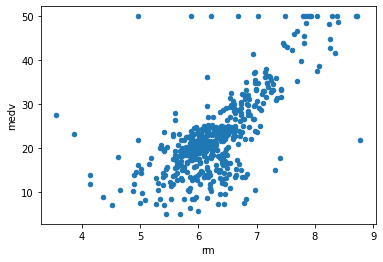

In [ ]:
BostonHousing.plot.scatter('rm', 'medv')

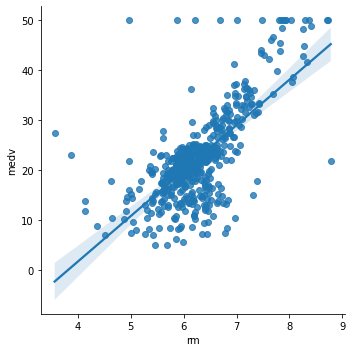

In [ ]:
sns.lmplot(x="rm",y="medv",data=BostonHousing)

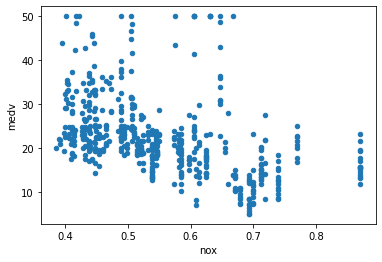

In [ ]:
BostonHousing.plot.scatter('nox', 'medv')

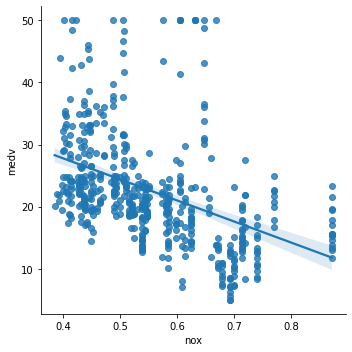

In [ ]:
sns.lmplot(x="nox",y="medv",data=BostonHousing)

In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

** Now lets take a look how the all variables relate to each other. **

In [ ]:
BostonHousing.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


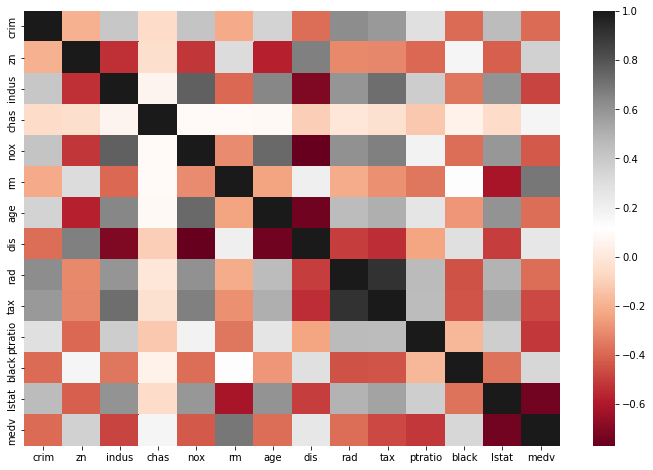

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonHousing.corr(), cmap = 'RdGy')

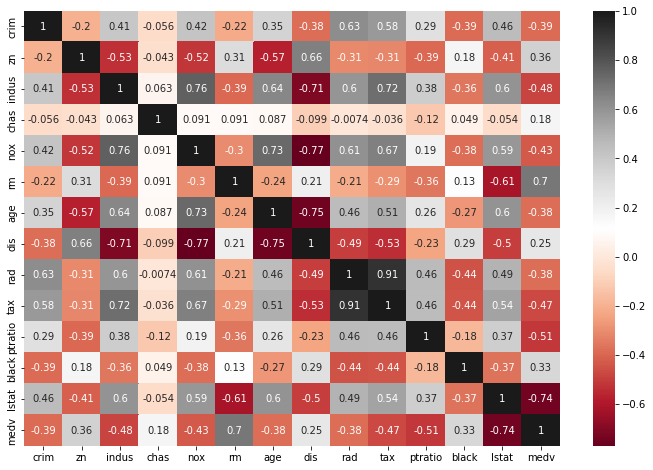

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonHousing.corr(), cmap = 'RdGy',annot=True)

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus at the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation                           
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation                               
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

**Lets plot the paiplot, for all different correlations**

Negative Correlation. 

When x is high y is low and vice versa.

To the right less negative correlation.

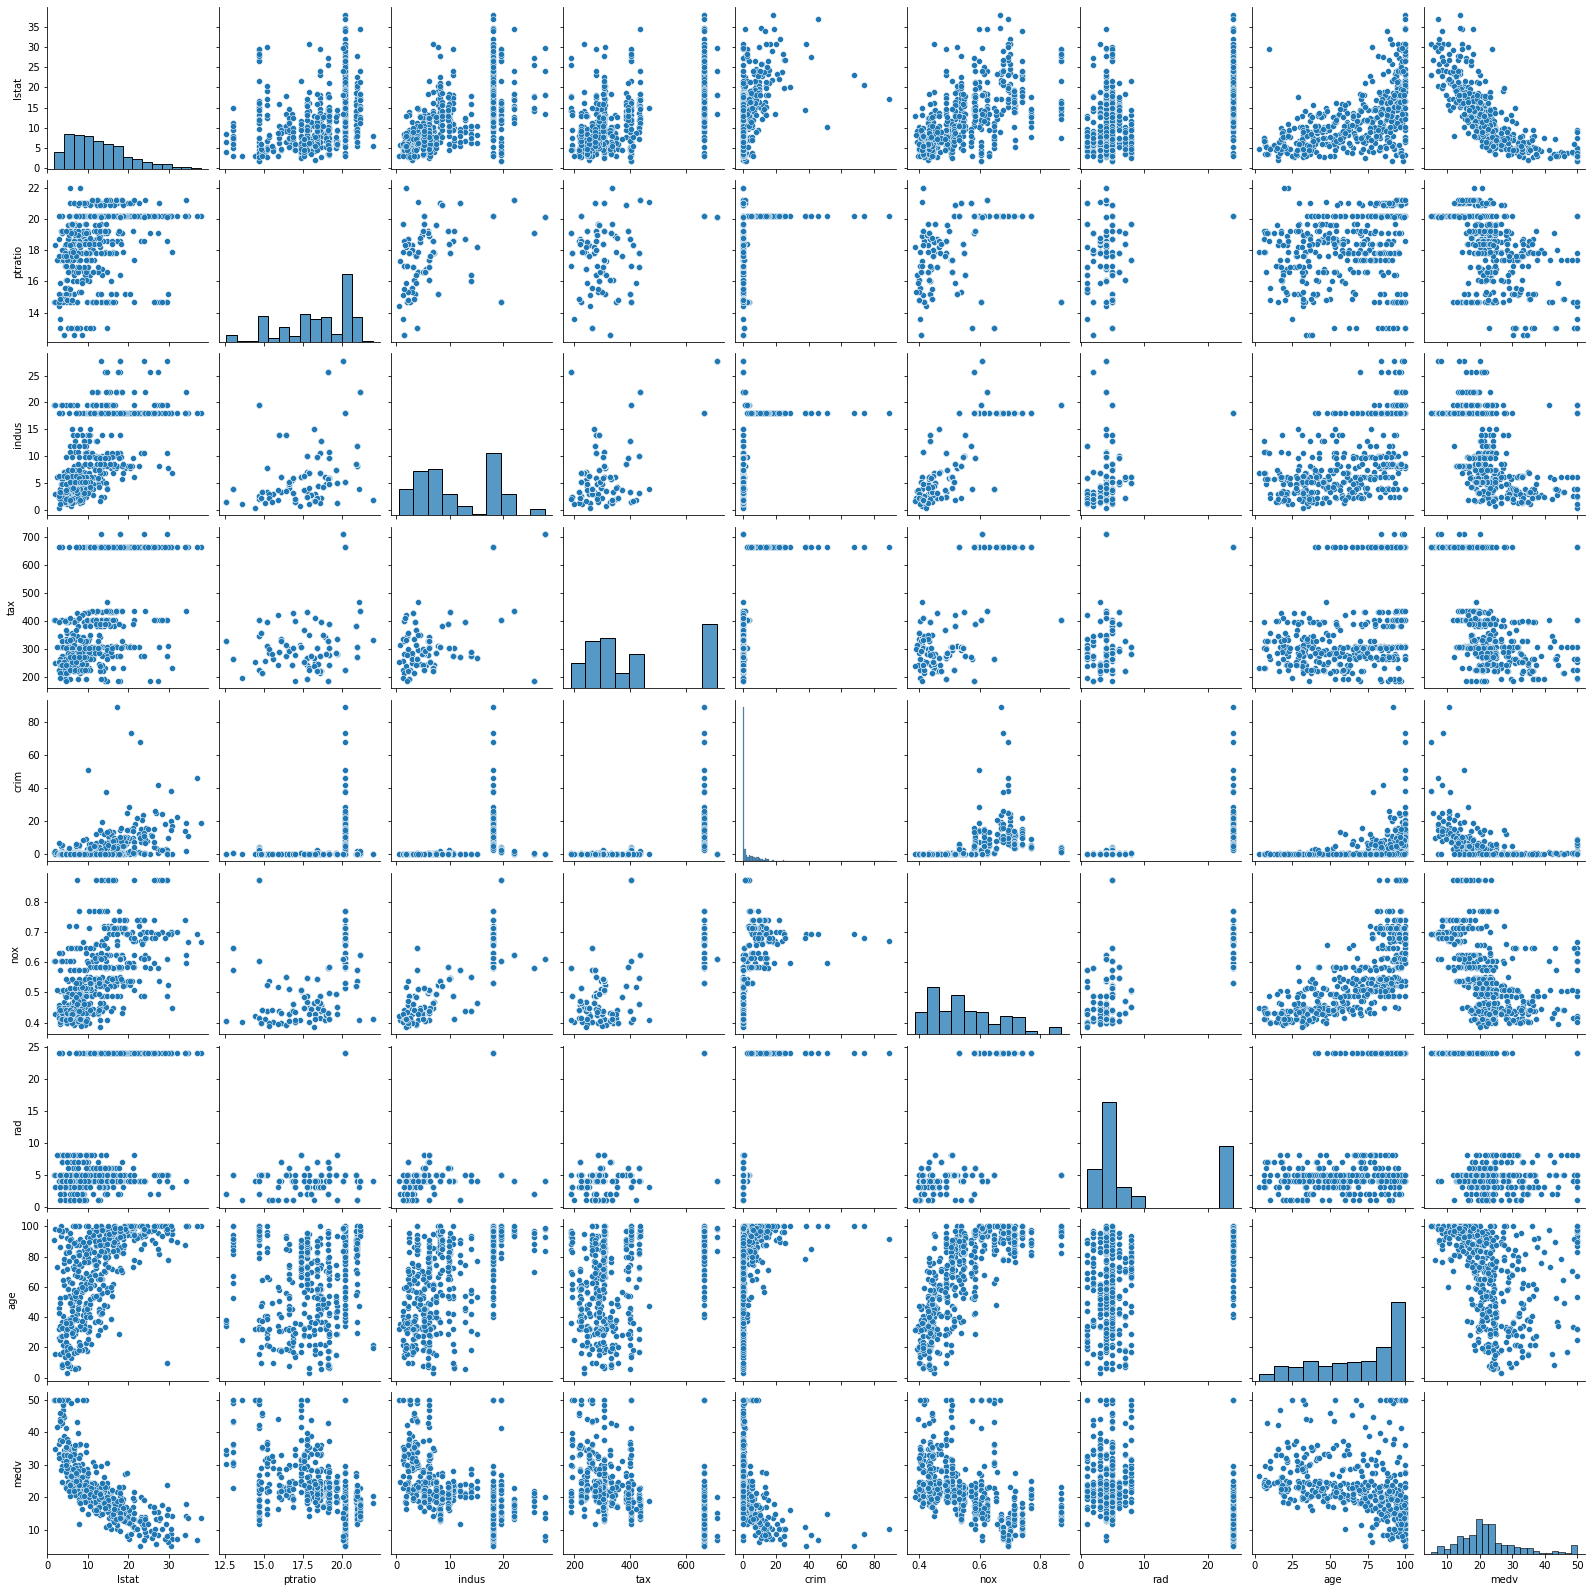

In [ ]:
sns.pairplot(BostonHousing, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

Zero Correlation. When x and y are completely independent

Positive Correlation. When x and y go together

to the right more independent.

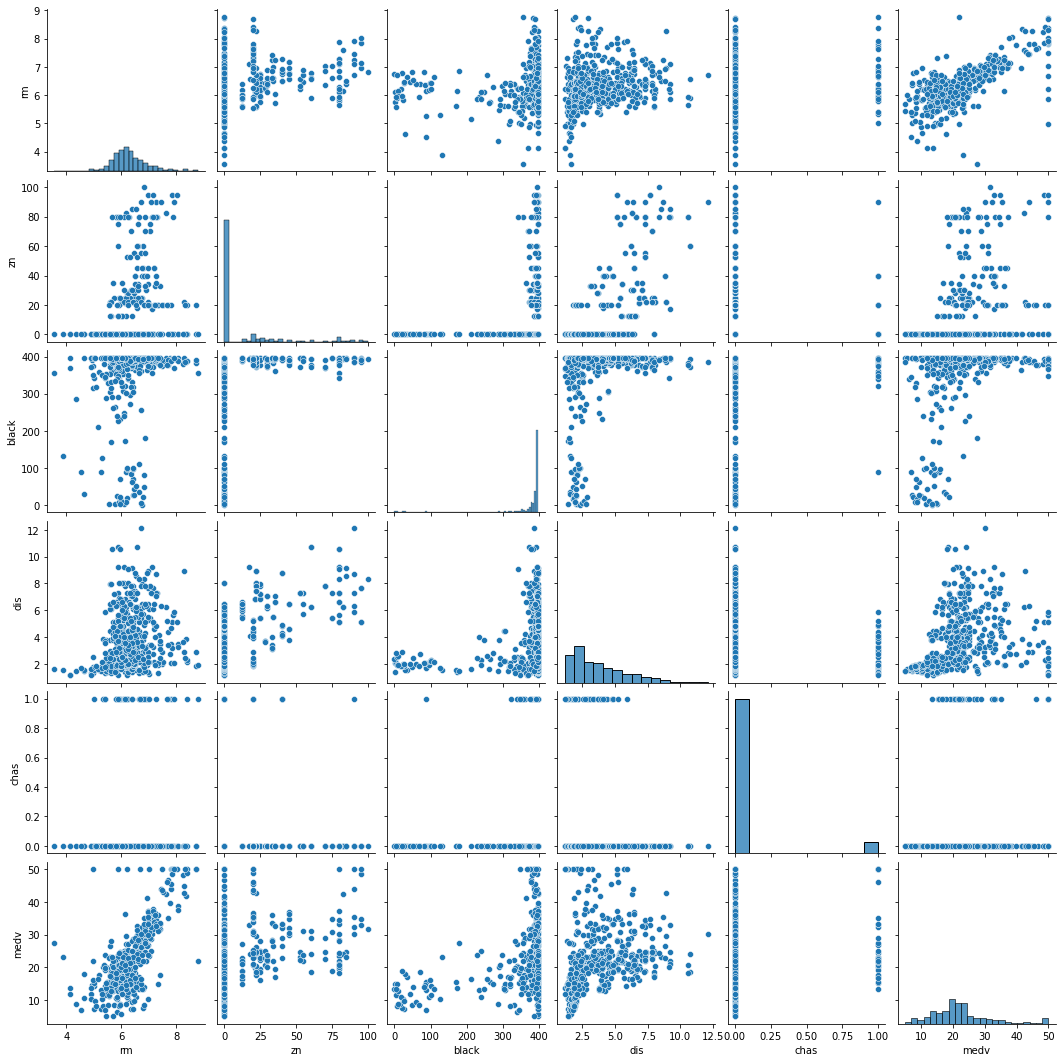

In [ ]:
sns.pairplot(BostonHousing, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])

# Trainning Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable

In [ ]:
X = BostonHousing[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonHousing['medv']

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

**Import sklearn librarys:**    
train_test_split, to split our data in two DF, one for build a model and other to validate.                                     
LinearRegression, to apply the linear regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([40.38909533, 27.88818526, 16.33126585, 17.34675932, 30.91273758,
       32.82478967, 39.95560959,  8.4519632 , 33.28696607,  7.26751237,
       29.77875241, 13.70647921, 16.10840816, 16.65150567, 25.03371365,
       19.89032014,  6.79501283, 32.9949698 , 28.45233055, 24.72790211,
       12.81760374, 20.2792643 , 22.37316895, 24.95238223, 34.01786165,
       19.10866644, 31.80654265, 19.09506858, 26.40103588, 34.13083397,
       19.66337036, 18.24445944, 36.99113563, 44.48687324, 30.72146569,
       22.31475986, 16.17389267, 17.91169858,  4.80466972, 30.60025057,
       23.92860043, 16.46250167, 35.26168512, 13.85353888, 17.81678796,
       25.33703575, 30.79303765, 16.47025922, 26.65460208, 23.15784888,
       32.62443559, 38.6798773 , 22.21243126, 15.78598365, 30.5359631 ,
       -0.25281891, 20.07283762, 16.83546069, 22.54691328, 20.67388019,
       30.46894504,  3.38104287, 13.94720253, 19.46240302, 10.03614762,
       24.67738776, 24.20357095, 19.43161581, 18.3602221 , 19.03

Text(0, 0.5, 'Predicted Y')

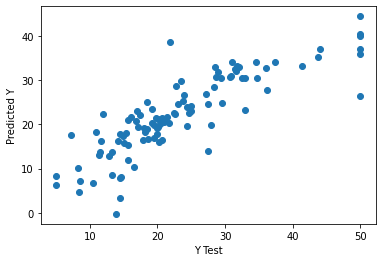

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.999404253053886
MSE: 33.26891855791978
RMSE: 5.7679215110748325


Considering the RMSE: we can conclude that  this model average error is RMSE at medv, which means RMSE *1000  in money

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


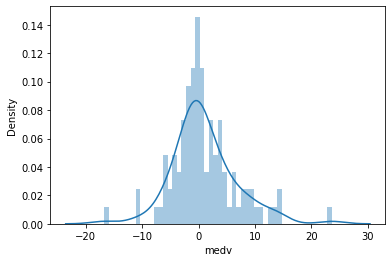

In [ ]:
sns.distplot((y_test-predictions),bins=50);

As more normal distribution, better it is.

In [ ]:
lm.coef_

array([-9.89913563e-02,  4.25047578e-02,  1.67390094e-02,  3.06437882e+00,
       -1.56462528e+01,  4.01888422e+00, -8.31558474e-04, -1.44628034e+00,
        2.67827281e-01, -1.04725485e-02, -8.88651815e-01,  8.25262805e-03,
       -5.49367192e-01])

In [ ]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.098991
zn,0.042505
indus,0.016739
chas,3.064379
nox,-15.646253
rm,4.018884
age,-0.000832
dis,-1.446280
rad,0.267827
tax,-0.010473


How to interpret those coefficients:
    they are in function of Medv, so 
    
    for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
    for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.

*1000 because the medv is in 1000
and this apply to the other variables/coefficients.
    

As i said, this is my first analysis at my first machine learning method and i'm sure its gonna be better in a near future and my english too =)

thanks

In [ ]:
intercept = lm.intercept_
intercept

32.90613090863691

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7034623076515891

# **What if you want to build a model based on the whole dataset with 506 examples/data points?**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001)

In [ ]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21
239,0.09252,30.0,4.93,0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05


# **What should we do?**

In [ ]:
X_train = X
y_train = y

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)

Text(0, 0.5, 'Predicted Y')

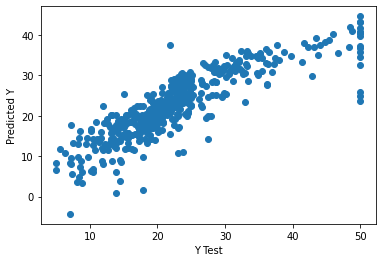

In [ ]:
plt.scatter(y_train,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))

# Root-mean-square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 3.2708628109003164
MSE: 21.894831181729202
RMSE: 4.679191295697281


In [ ]:
print('RMSE:', metrics.mean_squared_error(y_train, predictions, squared=False))

RMSE: 4.679191295697281


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


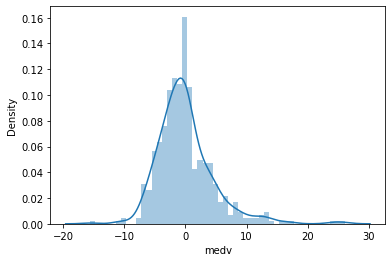

In [ ]:
sns.distplot((y_train-predictions),bins=50);

In [ ]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.108011
zn,0.046420
indus,0.020559
chas,2.686734
nox,-17.766611
rm,3.809865
age,0.000692
dis,-1.475567
rad,0.306049
tax,-0.012335


In [ ]:
intercept = lm.intercept_
intercept

36.45948838508978

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, predictions)

0.7406426641094095